<a href="https://www.kaggle.com/code/patimejia/fastai-02-production-test-writing-0-00-1?scriptVersionId=118320759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install or Update Fastai and DuckDuckGo Versions

In [1]:
!python -m pip list | grep fast

fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
pyfasttext                            0.4.6


check for duck duck go

In [2]:
!python -m pip list | grep 'du\|dd'

giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


Therefore, there is no installation of `duckduckgo` or any library with `du` or `dd` in its filename.

Install `duckduckgo_search` with `pip`:

In [3]:
!pip install -Uqq duckduckgo_search fastai


- `pip` is a recursive acronym that can stand for either "Pip Installs Packages" or "Pip Installs Python".
- `pip` is a command line tool for installing and managing Python packages, otherwise known as modules or libraries. Non-Python packages can also be installed using `pip` such as Java, C, C++, and Fortran libraries.
- `install` is a subcommand of `pip` that installs packages.
- `-U` is an option of `pip install` that upgrades the package to the latest version.
- `-qq` is an option of `pip install` that suppresses the output of the command.
- `duckduckgo_search` is the name of the package to install. It is a Python wrapper for the DuckDuckGo search engine and is available on PyPI. 
- `duckduckgo_search` is a dependency of `fastai` and is not installed by default.
- [documentation](https://pypi.org/project/duckduckgo-search/#3-ddg_images---image-search-by-duckduckgocom) for `duckduckgo_search`


In [4]:
!python -m pip list | grep 'du\|dd\|fast'

duckduckgo-search                     2.8.0
fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
pyfasttext                            0.4.6
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


shows `duckduckgo-search` verision 2.8.0 has been installed and `fastai` latest version

## Test: Installation and Import Process

In [5]:
def test_imports():
    try:
        import fastai
        import duckduckgo_search
        import fastdownload
    except ImportError as e:
        print(f'Import failed: {e}')
        return

    print(f'fastai version: {fastai.__version__}')
    print(f'duckduckgo_search version: {duckduckgo_search.__version__}')
    print(f'fastdownload version: {fastdownload.__version__}')
    print('Success! All import calls were successful.')


test_imports()

fastai version: 2.7.10
duckduckgo_search version: 2.8.0
fastdownload version: 0.0.7
Success! All import calls were successful.


# Collecting Data
## Create the Image Search Function

In [6]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *


def search_image_urls(term:str, max_images:int, min_sz:int)->List:
    print(f"Searching for {term} images with a minimum size of {min_sz}x{min_sz} pixels and a maximum of {max_images} images.")
    results = ddg_images(term, max_results=max_images)
    images = [result.get('image') for result in results if result.get('width')>min_sz and result.get('height')>min_sz]
    return L(images).unique().sorted()

The code imports the `ddg_images` function from the `duckduckgo_search"`library and the `L` function and everything else from the `fastai.vision.all` module.

A function `search_image_urls` is defined that takes in three arguments:

- `term`: a string representing the search term.
- `max_images`: the maximum number of images to be returned.
- `min_sz`: the minimum size of images to be returned.

The code prints a message indicating that it is searching for images using the search term.

The `ddg_images` function is called with the search term and the maximum number of images to be returned, and the result is stored in the `results` variable.

A list comprehension is used to filter the `results` to only include images that have a width and height greater than the `min_sz` value. The filtered images are stored in the `images` variable.

The code creates a fastai.core.List object using the `L` function and applies the `unique()` and `sorted()` methods to it to remove duplicate URLs and sort the list, respectively.

The result is returned as the output of the function.

In [7]:
term = 'Umbelliferae seeds'
min_sz=128
max_images=150 

url_list = search_image_urls(term, max_images, min_sz) 

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.


## Test: Image Search Function

In [8]:
def test_search_image_urls(url_list, number_of_results_to_print): 
    try:
        url_list = search_image_urls(term, max_images, min_sz)
    except Exception as e:
        print(f'Test failed: {e}')
        return

    print(f'Number of images found: {len(url_list)}')
    print(f'Number of duplicates: {len(url_list)-len(url_list.unique())}')
    print(f'Number of images dropped due to size: {max_images-len(url_list)}')
    print(f'Number of images kept: {len(url_list)}')
    print(f'Number of images to print: {number_of_results_to_print}')
    print('Success! The search_image_urls function works as expected.')
    print(f'Here are some sample urls: {url_list[:number_of_results_to_print]}')

In [9]:
test_search_image_urls(url_list,3)

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Number of images found: 149
Number of duplicates: 0
Number of images dropped due to size: 1
Number of images kept: 149
Number of images to print: 3
Success! The search_image_urls function works as expected.
Here are some sample urls: ['http://2.bp.blogspot.com/-E2ElRb0KWvg/UOZKbjOgvsI/AAAAAAAAACs/fr7Agrbpy-s/s1600/352-angelica_archangelica.jpg', 'http://castle.eiu.edu/prairie/images/periamer.fruits2.jpg', 'http://chileflora.com/Florachilena/ImagesHigh/NEIMG_2404.jpg']


## Test: Image Download and Save
Testing the process of downloading a single image from a URL, saving it to a path, and opening it

- Set image destination path `dest`
- Download first URL in `url_list` to `dest` with progress shown
- Open `dest` using `Image.open` method from the `PIL` library (Python Imaging Library).
- Resize to 256x256 with `resize` method
- Overwrite original with resized image and save to `dest`
- Display the resized image, `im`

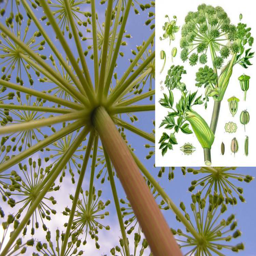

In [10]:
from fastdownload import download_url

dest = 'tests/test_image.jpg'
download_url(url_list[0], dest, show_progress=true)

im = Image.open(dest)
im = im.resize((256, 256))
im.save(dest)
im

- Define a Path object called `path` for the directory `tests`
- Get all image files within `tests` directory using `get_image_files`
- Store file paths in `fns`, a list of filenames
- Display the list of filenames, `fns`, in the `tests` folder

In [11]:
path = Path('tests')
fns = get_image_files(path)
fns

(#1) [Path('tests/test_image.jpg')]

# Fetch Images with Fastai's download_images
Using fastai's download_images to fetch all the URLs for each search term and store them in individual folders

In [12]:
seed_types = 'caraway seeds', 'ajwain seeds', 'fennel seeds'
path = Path('seeds')

In [13]:
if not path.exists():
    path.mkdir()
for seed_type in seed_types:
    dest = (path/seed_type)
    dest.mkdir(exist_ok=True)
    results = search_image_urls(seed_type, 150, 128)
    download_images(dest, urls=results)


Searching for caraway seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for ajwain seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for fennel seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.


## testing 

In [14]:
fns = get_image_files(path)
fns


(#412) [Path('seeds/fennel seeds/57c5b089-5d55-4bd4-b6ec-21e49fd9f2b7.jpg'),Path('seeds/fennel seeds/2422671f-22c2-4692-9b23-4b2ff72aa8a0.jpg'),Path('seeds/fennel seeds/d3a96545-801f-423a-a50f-3f85acbef002.jpg'),Path('seeds/fennel seeds/01eee0f3-698e-4795-95a7-b93038ce1f8b.jpg'),Path('seeds/fennel seeds/9a0ac262-9d84-4d06-a87a-c63d4cdc703b.jpg'),Path('seeds/fennel seeds/d76f2075-2f36-4e2a-b628-87c88e5113b8.jpg'),Path('seeds/fennel seeds/f0e863ad-93b0-4f73-ba6e-0c8e3de63f31.jpg'),Path('seeds/fennel seeds/9b34048b-a596-44d6-b101-5d063a50edf6.jpg'),Path('seeds/fennel seeds/00650b0a-21ec-46a5-abea-63c64e3ef246.jpg'),Path('seeds/fennel seeds/c0f05c56-e445-4b50-9ca0-ba339bbc1ac6.jpg')...]

In [15]:
len(fns)

412

In [16]:
for seed_type in seed_types:
    print(f'Number of {seed_type} images: {len(get_image_files(path/seed_type))}')
print(f'Total number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')


Number of caraway seeds images: 139
Number of ajwain seeds images: 138
Number of fennel seeds images: 135
Total number of images: 412


In [17]:
failed = verify_images(fns)
print(f'Number of images deleted: {len(failed)}')
failed


Number of images deleted: 4


(#4) [Path('seeds/fennel seeds/934fa38e-5908-459d-977f-2924fc895b8e.jpg'),Path('seeds/ajwain seeds/d283af49-6018-422d-83e7-df33c545a566.jpg'),Path('seeds/caraway seeds/f9b7905d-6052-4134-8b9d-92d2d17a1bce.jpg'),Path('seeds/caraway seeds/82122e89-def8-45ac-b41c-323bf0610e42.jpg')]

In [18]:
failed.map(Path.unlink);

In [19]:
for seed_type in seed_types:
    print(f'Number of {seed_type} images: {len(get_image_files(path/seed_type))}')

print(f'Start number of images found: {len(fns)}')
print(f'End number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')
print(f'Number of images deleted: {len(failed)}')

Number of caraway seeds images: 137
Number of ajwain seeds images: 137
Number of fennel seeds images: 134
Start number of images found: 412
End number of images: 408
Number of images deleted: 4


# Data Loader

In [20]:
seeds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

## Data augmentation: fractal vs. non-fractal

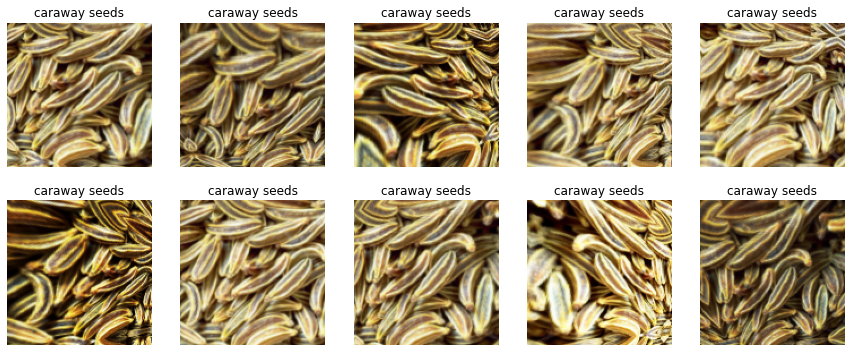

In [21]:
seeds = seeds.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = seeds.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

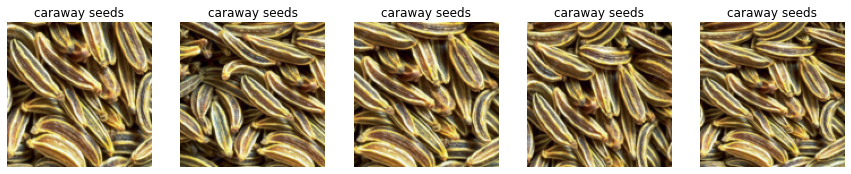

In [22]:
seedss = seeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = seeds.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

We selected `RandomResizedCrop` as it retains the geometric, symmetric and fractal features of seeds, making it ideal for analyzing natural patterns. Unlike the `aug_transforms` method, it doesn't alter the calculated fractals of nature. For non-fractal objects like ***teddy bears***, the `aug_transforms` method is a better option. The former method feels like observing a subject under a moving microscope, while the latter feels like inspecting a close-up item while walking.

# Train the model

### Hello Learner

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.945203,1.089884,0.333333,00:19


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.038774,0.850318,0.246914,00:23
1,0.993791,0.713299,0.197531,00:24
2,0.835157,0.704838,0.185185,00:24
3,0.744838,0.690902,0.185185,00:23


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


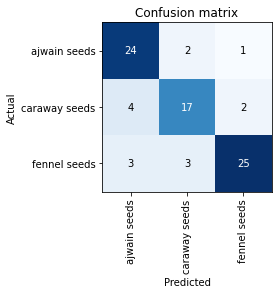

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

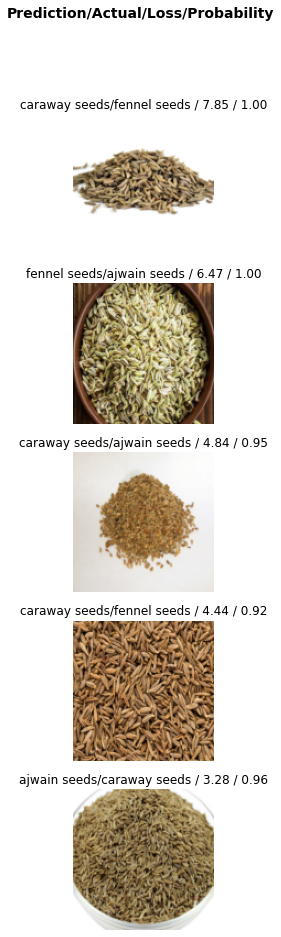

In [25]:
interp.plot_top_losses(5, nrows=5)


In [26]:
pip install fastai fastai2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Deleted 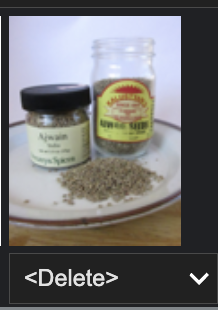
because there are two packages of seeds, and it is not possible to determine if they have been blended, for instance.

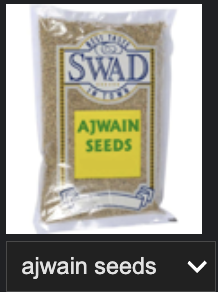

We discarded the seeds that were packaged in a covering, and it is impossible to differentiate between the seeds by just looking at them. We did not manually categorize them using the widget. As a result, we will use `delete()`:
```
# now ```
in place of
```
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```
which relocates the images to the appropriate category from the corrected label specified by the widget.

In [28]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()

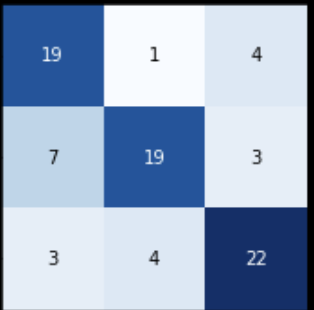

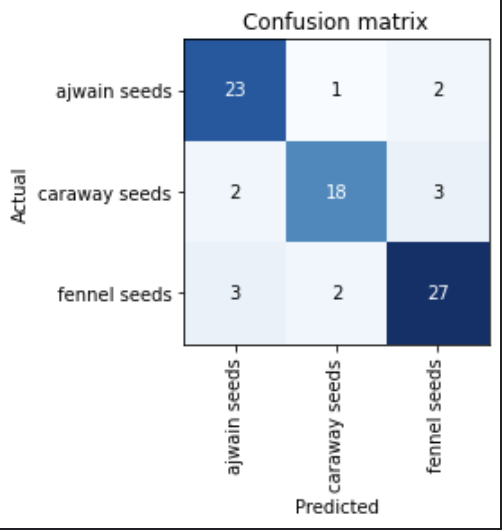

In [29]:
## Delete the test folder and everything inside it (optional):

# # Remove test folder and its content
# !rm -rf tests

# # Delete all files in the current directory.
# !pwd
# !rm -rf *

In [30]:
# # for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,caraway in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/caraway)

# for idx in cleaner.delete(): cleaner.fns[idx].unlink()

# # now that the neural network has been trained, we can remove the images that the model was not confident about (i.e. the images that the model was not confident about, but that we were confident about). We can do this by running the following code: 
# for idx,caraway in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/caraway)

# learn.export()

# path = Path()

# path.ls(file_exts='.pkl')  # pkl stands for pickle because it is a serialized object that can be saved to disk. The .pkl file is the model that we just exported used by the fastai library to make predictions.

# learn_inf = load_learner(path/'export.pkl')

# learn_inf.predict('tests/test_image.jpg')

# learn_inf.dls.vocab

# btn_upload = widgets.FileUpload()

# btn_upload

# out_pl = widgets.Output()

# out_pl.clear_output()   # to clear the output

# with out_pl: display(img.to_thumb(128,128))

# out_pl